In [2]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt

# 글꼴 설정 
plt.rcParams.update({'font.family':'Malgun Gothic','font.size':12}) #차트 글꼴 설정
plt.rc('axes',unicode_minus=False) #유니코드에서 음수 부호설정

font2 = {'family': 'Times New Roman',
      'color':  'blue',
      'weight': 'bold',
      'size': 12,
      'alpha': 0.7}

In [3]:
df = pd.read_csv("한강권역강수량관측정보.csv", encoding="cp949")
df.head()

,강수량관측일자,강수량관측소구분코드,강수량관측소명,강수량관측소주소,관할기관명,강수량자료값(mm)
0,20230519,10124140,인제군(상남초교),강원도 인제군 상남면 상남리 107 상남초교,한국수자원공사,NaN
1,20230519,10124150,인제군(귀둔리),강원도 인제군 인제읍 귀둔리 34-1,한국수자원공사,NaN
2,20230519,10124160,홍천군(명개리2),강원도 홍천군 내면 명개리 162-1,한국수자원공사,NaN
3,20230519,10124170,춘천시(천전리),강원도 춘천시 신북읍 천전리61-20,환경부,NaN
4,20230519,10124175,지내천,강원도 춘천시 동면 지내리 양정교,한국수력원자력,NaN


## 데이터 전처리

In [4]:
df1 = df[df['강수량관측소주소'].str.contains('성남시')]
df1

,강수량관측일자,강수량관측소구분코드,강수량관측소명,강수량관측소주소,관할기관명,강수량자료값(mm)
49,20230519,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,NaN
62,20230519,10184180,성남시(성남북초교),경기도 성남시 수정구 희망로 534번길 3 성남북초등학교,환경부,NaN
67,20230519,10184230,성남시(구미초교),경기도 성남시 분당구 미금로 22번길 25 구미초등학교,환경부,NaN
144,20230519,10184130,성남시(대장동),경기도 성남시 분당구 대장동 310,환경부,NaN
351,20230518,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,NaN
...,...,...,...,...,...,...
458458,20160102,10184130,성남시(대장동),경기도 성남시 분당구 대장동 310,환경부,0.0
458601,20160101,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0
458643,20160101,10184230,성남시(구미초교),경기도 성남시 분당구 미금로 22번길 25 구미초등학교,환경부,0.0
458655,20160101,10184180,성남시(성남북초교),경기도 성남시 수정구 희망로 534번길 3 성남북초등학교,환경부,0.0


In [5]:
df1 = df1.fillna(0)
df1.isnull().sum()

강수량관측일자       0
강수량관측소구분코드    0
강수량관측소명       0
강수량관측소주소      0
관할기관명         0
강수량자료값(mm)    0
dtype: int64

In [6]:
df1['강수량관측일자'] = df1['강수량관측일자'].astype(str)

In [7]:
df1['강수량관측일자'] = pd.to_datetime(df1['강수량관측일자'])

In [8]:
df1['year'] = pd.DatetimeIndex(df1['강수량관측일자']).year
df1['month'] = pd.DatetimeIndex(df1['강수량관측일자']).month
df1['day'] = pd.DatetimeIndex(df1['강수량관측일자']).day
df1

,강수량관측일자,강수량관측소구분코드,강수량관측소명,강수량관측소주소,관할기관명,강수량자료값(mm),year,month,day
49,2023-05-19,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0,2023,5,19
62,2023-05-19,10184180,성남시(성남북초교),경기도 성남시 수정구 희망로 534번길 3 성남북초등학교,환경부,0.0,2023,5,19
67,2023-05-19,10184230,성남시(구미초교),경기도 성남시 분당구 미금로 22번길 25 구미초등학교,환경부,0.0,2023,5,19
144,2023-05-19,10184130,성남시(대장동),경기도 성남시 분당구 대장동 310,환경부,0.0,2023,5,19
351,2023-05-18,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0,2023,5,18
...,...,...,...,...,...,...,...,...,...
458458,2016-01-02,10184130,성남시(대장동),경기도 성남시 분당구 대장동 310,환경부,0.0,2016,1,2
458601,2016-01-01,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0,2016,1,1
458643,2016-01-01,10184230,성남시(구미초교),경기도 성남시 분당구 미금로 22번길 25 구미초등학교,환경부,0.0,2016,1,1
458655,2016-01-01,10184180,성남시(성남북초교),경기도 성남시 수정구 희망로 534번길 3 성남북초등학교,환경부,0.0,2016,1,1


In [9]:
df1.set_index('강수량관측일자',inplace=True)
df1 = df1.sort_index()
df1.head()

,강수량관측소구분코드,강수량관측소명,강수량관측소주소,관할기관명,강수량자료값(mm),year,month,day
강수량관측일자,,,,,,,,
2016-01-01,10184130,성남시(대장동),경기도 성남시 분당구 대장동 310,환경부,0.0,2016,1,1
2016-01-01,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0,2016,1,1
2016-01-01,10184180,성남시(성남북초교),경기도 성남시 수정구 희망로 534번길 3 성남북초등학교,환경부,0.0,2016,1,1
2016-01-01,10184230,성남시(구미초교),경기도 성남시 분당구 미금로 22번길 25 구미초등학교,환경부,0.0,2016,1,1
2016-01-02,10184040,성남시(한국학중앙연구원),경기도 성남시 분당구 하오개로 323 한국학중앙연구원,환경부,0.0,2016,1,2


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7976 entries, 2016-01-01 to 2023-05-19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   강수량관측소구분코드  7976 non-null   int64  
 1   강수량관측소명     7976 non-null   object 
 2   강수량관측소주소    7976 non-null   object 
 3   관할기관명       7976 non-null   object 
 4   강수량자료값(mm)  7976 non-null   float64
 5   year        7976 non-null   int64  
 6   month       7976 non-null   int64  
 7   day         7976 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 560.8+ KB


In [11]:
df1['강수량관측소구분코드'].value_counts()

10184130    1994
10184040    1994
10184180    1994
10184230    1994
Name: 강수량관측소구분코드, dtype: int64

## 관측소별 데이터

In [12]:
data040= df1[df1['강수량관측소구분코드']==10184040]
data180= df1[df1['강수량관측소구분코드']==10184180]
data230= df1[df1['강수량관측소구분코드']==10184230]
data130= df1[df1['강수량관측소구분코드']==10184130]

In [13]:
pd.set_option('display.max_row',10)
data040[['year','month']].value_counts()

year  month
2016  1        31
2017  1        31
2018  3        31
2019  8        31
2017  8        31
               ..
2020  4        21
2023  5        19
2018  10       14
      9         9
2017  10        1
Length: 71, dtype: int64

### 10184040관측소 연도별 6, 7, 8월 데이터

In [14]:
data0402016=data040[(data040['year']==2016) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402017=data040[(data040['year']==2017) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402018=data040[(data040['year']==2018) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402019=data040[(data040['year']==2019) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402020=data040[(data040['year']==2020) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402021=data040[(data040['year']==2021) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]
data0402022=data040[(data040['year']==2022) & ((data040['month']==6)|(data040['month']==7)|(data040['month']==8))]

### 10184040관측소 연도별 6, 7, 8월 강수량 데이터

* 2016

In [15]:
grouped04020161 = data0402016[data0402016['강수량자료값(mm)']> 0 ].groupby(data0402016['month'])
grouped04020162 = data0402016[data0402016['강수량자료값(mm)']> 60 ].groupby(data0402016['month'])
grouped04020162.size()/grouped04020161.size()

month
6         NaN
7    0.214286
8         NaN
dtype: float64

* 2017

In [16]:
grouped04020171 = data0402017[data0402017['강수량자료값(mm)']> 0 ].groupby(data0402017['month'])
grouped04020172 = data0402017[data0402017['강수량자료값(mm)']> 60 ].groupby(data0402017['month'])
grouped04020172.size()/grouped04020171.size()

month
6         NaN
7    0.210526
8    0.125000
dtype: float64

* 2018

In [22]:
grouped04020181 = data0402018[data0402018['강수량자료값(mm)']> 0 ].groupby(data0402018['month'])
grouped04020182 = data0402018[data0402018['강수량자료값(mm)']> 60 ].groupby(data0402018['month'])
grouped04020182.size()/grouped04020181.size()

month
6    0.166667
7    0.250000
8    0.100000
dtype: float64

* 2019

In [28]:
grouped04020191 = data0402019[data0402019['강수량자료값(mm)']> 0 ].groupby(data0402019['month'])
grouped04020192 = data0402019[data0402019['강수량자료값(mm)']> 60 ].groupby(data0402019['month'])
grouped04020192.size()/grouped04020191.size()

C:\Users\82103\AppData\Local\Temp\ipykernel_9112\1552929395.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  grouped04020191 = data0402019[data0402019['강수량자료값(mm)']> 0 ].groupby(data0402019['month'])


ValueError: cannot reindex on an axis with duplicate labels

* 2020 (데이터 없음)

In [ ]:
grouped04020201 = data0402020[data0402020['강수량자료값(mm)']> 0 ].groupby(data0402020['month'])
grouped04020202 = data0402020[data0402020['강수량자료값(mm)']> 60 ].groupby(data0402020['month'])
grouped04020202.size()/grouped04020201.size()

* 2021 (데이터 없음)

In [77]:
grouped04020211 = data0402021[data0402021['강수량자료값(mm)']> 0 ].groupby(data0402021['month'])
grouped04020212 = data0402021[data0402021['강수량자료값(mm)']> 60 ].groupby(data0402021['month'])
grouped04020212.size()/grouped04020211.size()

Series([], dtype: int64)

* 2022 (비 안옴)

In [75]:
grouped04020221 = data0402022[data0402022['강수량자료값(mm)']> 0 ].groupby(data0402022['month'])
grouped04020222 = data0402022[data0402022['강수량자료값(mm)']> 60 ].groupby(data0402022['month'])
grouped04020222.size()/grouped04020221.size()

Series([], dtype: float64)

### 10184040관측소 데이터 시각화

In [19]:
rkdf0401=grouped04020162.size()/grouped04020161.size()
rkdf0402=grouped04020172.size()/grouped04020171.size()
rkdf0403=grouped04020182.size()/grouped04020181.size()
rkdf0404=grouped04020192.size()/grouped04020191.size()

NameError: name 'grouped04020192' is not defined

Text(0.5, 0.98, '호우주의보 비율')

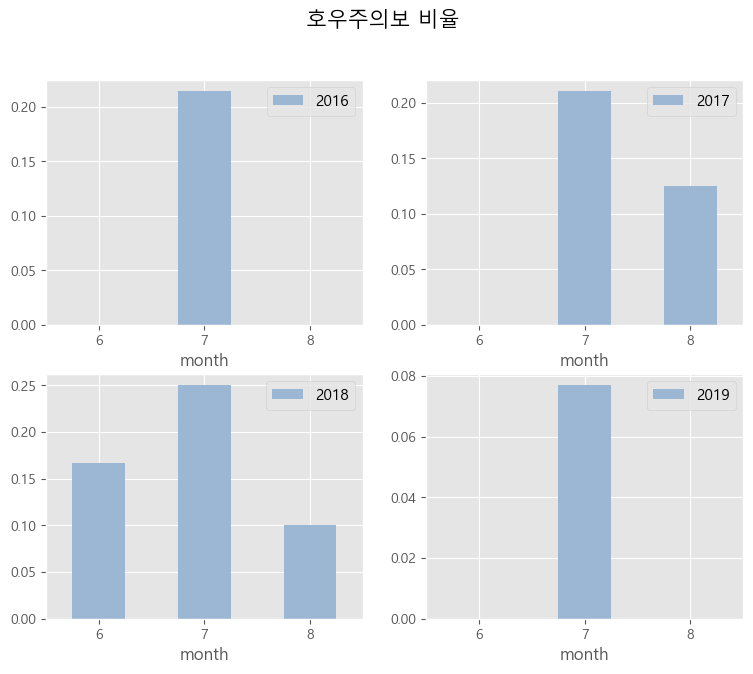

In [222]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 7))

plt.subplot(2,2,1)
rkdf0401.plot(x='month',kind='bar', color='#9bb7d4')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2016'], loc='upper right', fontsize=11)

plt.subplot(2,2,2)
rkdf0402.plot(x='month',kind='bar', color='#9bb7d4')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2017'], loc='upper right', fontsize=11)

plt.subplot(2,2,3)
rkdf0403.plot(x='month',kind='bar', color='#9bb7d4')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2018'], loc='upper right', fontsize=11)

plt.subplot(2,2,4)
rkdf0404.plot(x='month',kind='bar', color='#9bb7d4')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2019'], loc='upper right', fontsize=11)

plt.suptitle('호우주의보 비율', size=15)

### 10184180관측소 연도별 6, 7, 8월 데이터

In [23]:
data1802016=data180[(data180['year']==2016) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802017=data180[(data180['year']==2017) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802018=data180[(data180['year']==2018) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802019=data180[(data180['year']==2019) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802020=data180[(data180['year']==2020) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802021=data180[(data180['year']==2021) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]
data1802022=data180[(data180['year']==2022) & ((data180['month']==6)|(data180['month']==7)|(data180['month']==8))]

### 10184180관측소 연도별 6, 7, 8월 강수량 데이터

* 2016

In [24]:
grouped18020161 = data1802016[data1802016['강수량자료값(mm)']> 0 ].groupby(data1802016['month'])
grouped18020162 = data1802016[data1802016['강수량자료값(mm)']> 60 ].groupby(data1802016['month'])
grouped18020162.size()/grouped18020161.size()

month
6         NaN
7    0.142857
8         NaN
dtype: float64

* 2017

In [25]:
grouped18020171 = data1802017[data1802017['강수량자료값(mm)']> 0 ].groupby(data1802017['month'])
grouped18020172 = data1802017[data1802017['강수량자료값(mm)']> 60 ].groupby(data1802017['month'])
grouped18020172.size()/grouped18020171.size()

month
6         NaN
7    0.210526
8    0.142857
dtype: float64

* 2018

In [26]:
grouped18020181 = data1802018[data1802018['강수량자료값(mm)']> 0 ].groupby(data1802018['month'])
grouped18020182 = data1802018[data1802018['강수량자료값(mm)']> 60 ].groupby(data1802018['month'])
grouped18020182.size()/grouped18020181.size()

month
6    0.200000
7    0.333333
8    0.083333
dtype: float64

* 2019

In [27]:
grouped18020191 = data1802019[data1802019['강수량자료값(mm)']> 0 ].groupby(data1802019['month'])
grouped18020192 = data1802019[data1802019['강수량자료값(mm)']> 60 ].groupby(data1802019['month'])
grouped18020192.size()/grouped18020191.size()

C:\Users\82103\AppData\Local\Temp\ipykernel_9112\1671104360.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  grouped18020191 = data1802019[data1802019['강수량자료값(mm)']> 0 ].groupby(data1802019['month'])


ValueError: cannot reindex on an axis with duplicate labels

* 2020

In [102]:
grouped18020201 = data1802020[data1802020['강수량자료값(mm)']> 0 ].groupby(data1802020['month'])
grouped18020202 = data1802020[data1802020['강수량자료값(mm)']> 60 ].groupby(data1802020['month'])
grouped18020202.size()/grouped18020201.size()

Series([], dtype: float64)

* 2021

In [103]:
grouped18020211 = data1802021[data1802021['강수량자료값(mm)']> 0 ].groupby(data1802021['month'])
grouped18020212 = data1802021[data1802021['강수량자료값(mm)']> 60 ].groupby(data1802021['month'])
grouped18020212.size()/grouped18020211.size()

Series([], dtype: float64)

* 2022

In [104]:
grouped18020221 = data1802022[data1802022['강수량자료값(mm)']> 0 ].groupby(data1802022['month'])
grouped18020222 = data1802022[data1802022['강수량자료값(mm)']> 60 ].groupby(data1802022['month'])
grouped18020222.size()/grouped18020221.size()

Series([], dtype: float64)

### 10184180관측소 데이터 시각화

In [224]:
rkdf1801=grouped18020162.size()/grouped18020161.size()
rkdf1802=grouped18020172.size()/grouped18020171.size()
rkdf1803=grouped18020182.size()/grouped18020181.size()
rkdf1804=grouped18020192.size()/grouped18020191.size()

Text(0.5, 0.98, '호우주의보 비율')

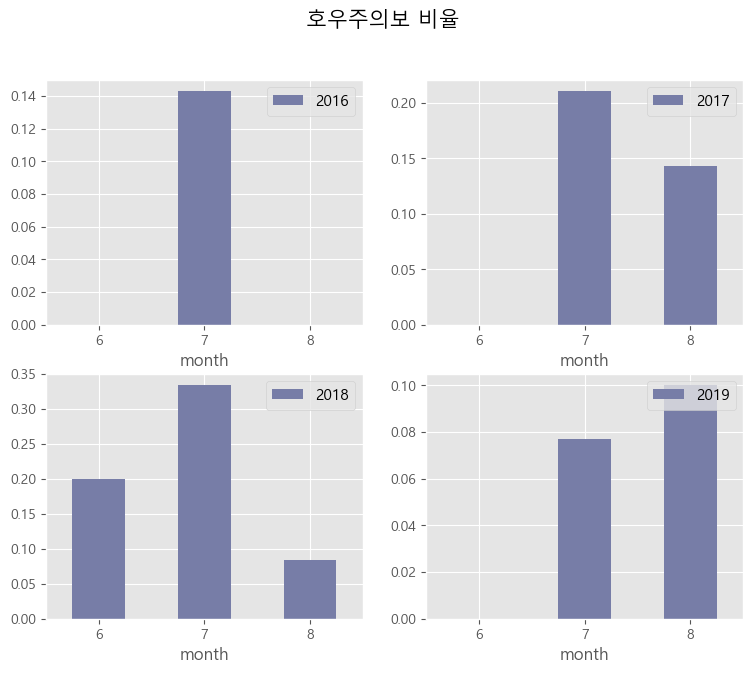

In [225]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 7))

plt.subplot(2,2,1)
rkdf1801.plot(x='month',kind='bar', color='#777da7')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2016'], loc='upper right', fontsize=11)

plt.subplot(2,2,2)
rkdf1802.plot(x='month',kind='bar', color='#777da7')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2017'], loc='upper right', fontsize=11)

plt.subplot(2,2,3)
rkdf1803.plot(x='month',kind='bar', color='#777da7')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2018'], loc='upper right', fontsize=11)

plt.subplot(2,2,4)
rkdf1804.plot(x='month',kind='bar', color='#777da7')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2019'], loc='upper right', fontsize=11)

plt.suptitle('호우주의보 비율', size=15)

### 10184230관측소 연도별 6, 7, 8월 데이터

In [105]:
data2302016=data230[(data230['year']==2016) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302017=data230[(data230['year']==2017) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302018=data230[(data230['year']==2018) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302019=data230[(data230['year']==2019) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302020=data230[(data230['year']==2020) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302021=data230[(data230['year']==2021) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]
data2302022=data230[(data230['year']==2022) & ((data230['month']==6)|(data230['month']==7)|(data230['month']==8))]

### 10184230관측소 연도별 6, 7, 8월 강수량 데이터

* 2016

In [107]:
grouped23020161 = data2302016[data2302016['강수량자료값(mm)']> 0 ].groupby(data2302016['month'])
grouped23020162 = data2302016[data2302016['강수량자료값(mm)']> 60 ].groupby(data2302016['month'])
grouped23020162.size()/grouped23020161.size()

month
6         NaN
7    0.076923
8         NaN
dtype: float64

* 2017

In [108]:
grouped23020171 = data2302017[data2302017['강수량자료값(mm)']> 0 ].groupby(data2302017['month'])
grouped23020172 = data2302017[data2302017['강수량자료값(mm)']> 60 ].groupby(data2302017['month'])
grouped23020172.size()/grouped23020171.size()

month
6         NaN
7    0.315789
8    0.133333
dtype: float64

* 2018

In [109]:
grouped23020181 = data2302018[data2302018['강수량자료값(mm)']> 0 ].groupby(data2302018['month'])
grouped23020182 = data2302018[data2302018['강수량자료값(mm)']> 60 ].groupby(data2302018['month'])
grouped23020182.size()/grouped23020181.size()

month
6    0.200000
7    0.285714
8    0.200000
dtype: float64

* 2019

In [110]:
grouped23020191 = data2302019[data2302019['강수량자료값(mm)']> 0 ].groupby(data2302019['month'])
grouped23020192 = data2302019[data2302019['강수량자료값(mm)']> 60 ].groupby(data2302019['month'])
grouped23020192.size()/grouped23020191.size()

month
6         NaN
7    0.076923
8    0.076923
dtype: float64

* 2020

In [111]:
grouped23020201 = data2302020[data2302020['강수량자료값(mm)']> 0 ].groupby(data2302020['month'])
grouped23020202 = data2302020[data2302020['강수량자료값(mm)']> 60 ].groupby(data2302020['month'])
grouped23020202.size()/grouped23020201.size()

Series([], dtype: float64)

* 2021

In [112]:
grouped23020211 = data2302021[data2302021['강수량자료값(mm)']> 0 ].groupby(data2302021['month'])
grouped23020212 = data2302021[data2302021['강수량자료값(mm)']> 60 ].groupby(data2302021['month'])
grouped23020212.size()/grouped23020211.size()

Series([], dtype: float64)

* 2022

In [113]:
grouped23020221 = data2302022[data2302022['강수량자료값(mm)']> 0 ].groupby(data2302022['month'])
grouped23020222 = data2302022[data2302022['강수량자료값(mm)']> 60 ].groupby(data2302022['month'])
grouped23020222.size()/grouped23020221.size()

Series([], dtype: float64)

### 10184230관측소 데이터 시각화

In [228]:
rkdf2301=grouped23020162.size()/grouped23020161.size()
rkdf2302=grouped23020172.size()/grouped23020171.size()
rkdf2303=grouped23020182.size()/grouped23020181.size()
rkdf2304=grouped23020192.size()/grouped23020191.size()

Text(0.5, 0.98, '호우주의보 비율')

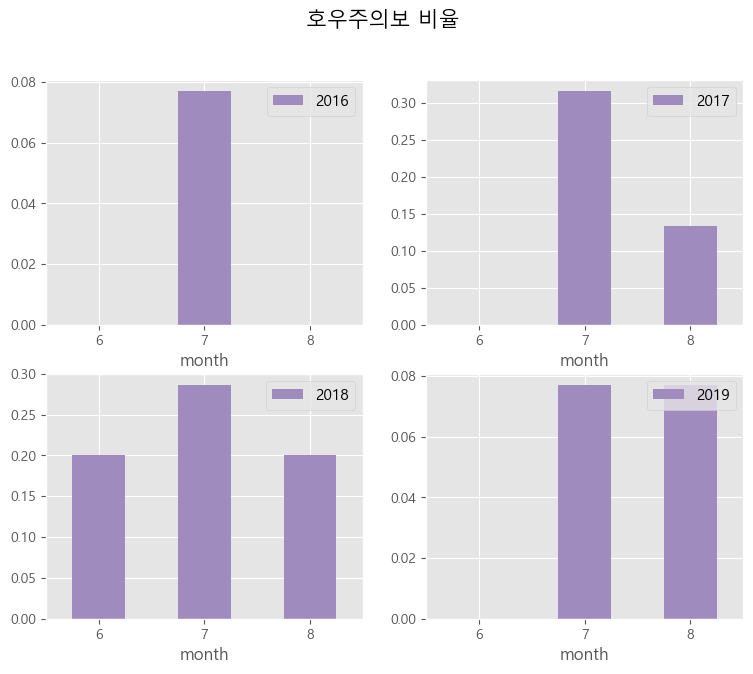

In [229]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 7))

plt.subplot(2,2,1)
rkdf2301.plot(x='month',kind='bar', color='#a08bbe')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2016'], loc='upper right', fontsize=11)

plt.subplot(2,2,2)
rkdf2302.plot(x='month',kind='bar', color='#a08bbe')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2017'], loc='upper right', fontsize=11)

plt.subplot(2,2,3)
rkdf2303.plot(x='month',kind='bar', color='#a08bbe')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2018'], loc='upper right', fontsize=11)

plt.subplot(2,2,4)
rkdf2304.plot(x='month',kind='bar', color='#a08bbe')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2019'], loc='upper right', fontsize=11)

plt.suptitle('호우주의보 비율', size=15)

### 10184130관측소 연도별 6, 7, 8월 데이터

In [114]:
data1302016=data130[(data130['year']==2016) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302017=data130[(data130['year']==2017) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302018=data130[(data130['year']==2018) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302019=data130[(data130['year']==2019) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302020=data130[(data130['year']==2020) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302021=data130[(data130['year']==2021) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]
data1302022=data130[(data130['year']==2022) & ((data130['month']==6)|(data130['month']==7)|(data130['month']==8))]

### 10184130관측소 연도별 6, 7, 8월 강수량 데이터

* 2016

In [115]:
grouped13020161 = data1302016[data1302016['강수량자료값(mm)']> 0 ].groupby(data1302016['month'])
grouped13020162 = data1302016[data1302016['강수량자료값(mm)']> 60 ].groupby(data1302016['month'])
grouped13020162.size()/grouped13020161.size()

month
6         NaN
7    0.153846
8         NaN
dtype: float64

* 2017

In [116]:
grouped13020171 = data1302017[data1302017['강수량자료값(mm)']> 0 ].groupby(data1302017['month'])
grouped13020172 = data1302017[data1302017['강수량자료값(mm)']> 60 ].groupby(data1302017['month'])
grouped13020172.size()/grouped13020171.size()

month
6         NaN
7    0.235294
8    0.166667
dtype: float64

* 2018

In [117]:
grouped13020181 = data1302018[data1302018['강수량자료값(mm)']> 0 ].groupby(data1302018['month'])
grouped13020182 = data1302018[data1302018['강수량자료값(mm)']> 60 ].groupby(data1302018['month'])
grouped13020182.size()/grouped13020181.size()

month
6    0.166667
7    0.142857
8    0.111111
dtype: float64

* 2019

In [118]:
grouped13020191 = data1302019[data1302019['강수량자료값(mm)']> 0 ].groupby(data1302019['month'])
grouped13020192 = data1302019[data1302019['강수량자료값(mm)']> 60 ].groupby(data1302019['month'])
grouped13020192.size()/grouped13020191.size()

month
6         NaN
7    0.076923
8    0.100000
dtype: float64

* 2020

In [119]:
grouped13020201 = data1302020[data1302020['강수량자료값(mm)']> 0 ].groupby(data1302020['month'])
grouped13020202 = data1302020[data1302020['강수량자료값(mm)']> 60 ].groupby(data1302020['month'])
grouped13020202.size()/grouped13020201.size()

Series([], dtype: float64)

* 2021

In [120]:
grouped13020211 = data1302021[data1302021['강수량자료값(mm)']> 0 ].groupby(data1302021['month'])
grouped13020212 = data1302021[data1302021['강수량자료값(mm)']> 60 ].groupby(data1302021['month'])
grouped13020212.size()/grouped13020211.size()

Series([], dtype: float64)

* 2022

In [121]:
grouped13020221 = data1302022[data1302022['강수량자료값(mm)']> 0 ].groupby(data1302022['month'])
grouped13020222 = data1302022[data1302022['강수량자료값(mm)']> 60 ].groupby(data1302022['month'])
grouped13020222.size()/grouped13020221.size()

Series([], dtype: float64)

### 10184130관측소 데이터 시각화

In [231]:
rkdf1301=grouped13020162.size()/grouped13020161.size()
rkdf1302=grouped13020172.size()/grouped13020171.size()
rkdf1303=grouped13020182.size()/grouped13020181.size()
rkdf1304=grouped13020192.size()/grouped13020191.size()

Text(0.5, 0.98, '호우주의보 비율')

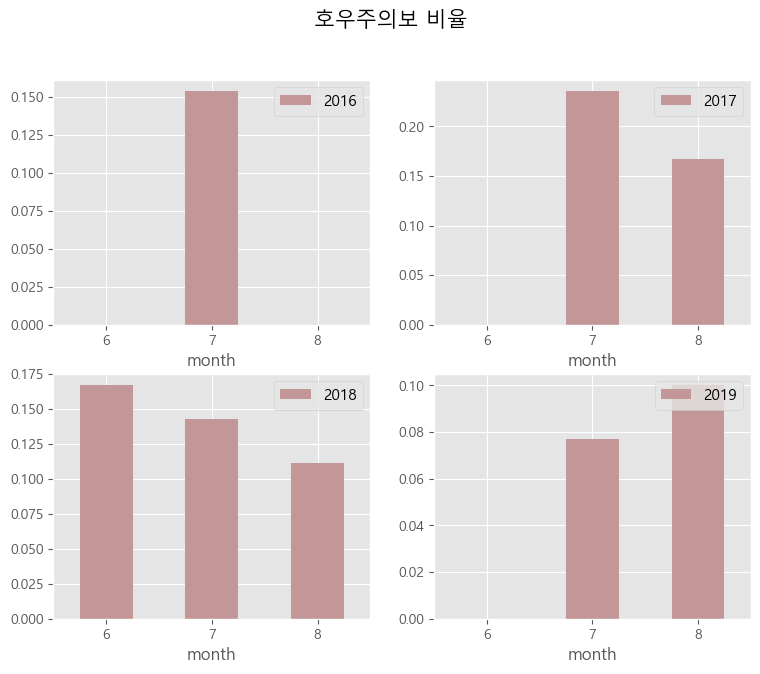

In [234]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 7))

plt.subplot(2,2,1)
rkdf1301.plot(x='month',kind='bar', color='#c39797')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2016'], loc='upper right', fontsize=11)

plt.subplot(2,2,2)
rkdf1302.plot(x='month',kind='bar', color='#c39797')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2017'], loc='upper right', fontsize=11)

plt.subplot(2,2,3)
rkdf1303.plot(x='month',kind='bar', color='#c39797')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2018'], loc='upper right', fontsize=11)

plt.subplot(2,2,4)
rkdf1304.plot(x='month',kind='bar', color='#c39797')
plt.xticks(rotation='horizontal')
plt.legend(labels=['2019'], loc='upper right', fontsize=11)

plt.suptitle('호우주의보 비율', size=15)

## 위험도

In [8]:
gg_df = pd.read_csv("gg_data_ll.csv", encoding="cp949")
gg_df.columns

Index(['연번', '구분', '하천명', '구간_시점', '구간_종점', '유역_면적(제곱킬로미터)', '하천연장(킬로미터)',
       '제방_총연장', '제방_개수', '제방_미개수', '개수율', '데이터기준일자', '위도', '경도'],
      dtype='object')

In [ ]:
riskdf=gg_df.loc[:,('하천명','유역_면적(제곱킬로미터)','하천연장(킬로미터)','개수율')]

In [258]:
riskdf['하천밀도']=riskdf.loc[:,'하천연장(킬로미터)']/riskdf.loc[:,'유역_면적(제곱킬로미터)']

In [260]:
riskdf['표준화_개수율']=(riskdf['개수율']-riskdf['개수율'].mean())/riskdf['개수율'].std()

In [262]:
riskdf['표준화_하천밀도']=(riskdf['하천밀도']-riskdf['하천밀도'].mean())/riskdf['하천밀도'].std()

In [263]:
riskdf

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,탄천,145.74,15.700,100.0,0.107726,0.941613,-1.268275
1,동막천,29.34,7.120,28.3,0.242672,-2.170413,-0.994677
2,분당천,11.89,3.620,100.0,0.304458,0.941613,-0.869409
3,운중천,24.91,8.000,86.7,0.321156,0.364348,-0.835553
4,금토천,9.77,3.070,37.1,0.314227,-1.788462,-0.849601
...,...,...,...,...,...,...,...
31,동막4천,0.35,0.404,44.1,1.154286,-1.484638,0.853585
32,운중3천,0.56,0.390,92.6,0.696429,0.620428,-0.074703
33,하산천,1.26,0.737,100.0,0.584921,0.941613,-0.300781
34,석운천,4.40,2.378,80.7,0.540455,0.103927,-0.390934


In [1]:
riskdf['표준화_개수율'].mean()

NameError: name 'riskdf' is not defined